# Connect Google Colab with Google Drive  連接 Colab 與 drive 

In [ ]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Mounted at /content/gdrive


# Import Packages  匯入套件

In [ ]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt  
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Reshape, Bidirectional, LSTM
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

print( 'TensorFlow Version:', tf.__version__ )
print( 'Keras Version:', tf.keras.__version__ ) 

TensorFlow Version: 2.8.2
Keras Version: 2.8.0


In [ ]:
!gdown 1cOOJGVmxVo1evTU9xQdSbztFmeFXTwif

Downloading...
From: https://drive.google.com/uc?id=1cOOJGVmxVo1evTU9xQdSbztFmeFXTwif
To: /content/Feature_Img.rar
100% 59.9M/59.9M [00:00<00:00, 289MB/s]


In [ ]:
!gdown 1NSzSUdXXhK8exFlrSUcLwjBicLLCjt6q

Downloading...
From: https://drive.google.com/uc?id=1NSzSUdXXhK8exFlrSUcLwjBicLLCjt6q
To: /content/Label.rar
100% 1.16M/1.16M [00:00<00:00, 70.1MB/s]


In [ ]:
!unrar x '/content/Feature_Img.rar'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_0.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_1.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_2.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_3.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_4.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_5.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_2_6.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_3_0.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_3_1.png                  31%  OK 
Extracting  Feature_Img/20151113_0052_25464_1_tg_3_2.png                  31%  OK 
Extracting  Feature_Img

In [ ]:
!unrar x '/content/Label.rar'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  Label/20151113_0052_25464_1_tg_0_0.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_1.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_2.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_3.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_4.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_5.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_6.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_0_7.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_1_0.txt                        31%  OK 
Extracting  Label/20151113_0052_25464_1_tg_1_1.txt                        31%  OK 
Extracting  Label/20151

#Dataset  驗證碼資料集

In [ ]:
os.chdir( r"/content/gdrive/My Drive" )
if not os.path.isdir( r"CRNN_with_CTC_Loss" ):     
    print( 'Downloading the Captcha images dataset ...' )
    !pip install patool
    import patoolib
    import glob
    # Clone a GitHub repository to our Google Drive
    !git clone https://github.com/YenLinWu/CRNN_with_CTC_Loss.git     
    # Unzip the file with filename contains '.rar'
    rar = glob.glob( r"CRNN_with_CTC_Loss/*.rar" )
    for i in range(len(rar)):
        patoolib.extract_archive( rar[i], outdir=r"/content/gdrive/My Drive" )

else: print( 'Captcha images dataset is ready.' )

Cloning into 'CRNN_with_CTC_Loss'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 60 (delta 25), reused 33 (delta 8), pack-reused 0
Unpacking objects: 100% (60/60), done.
patool: Extracting CRNN_with_CTC_Loss/CaptchaImages.rar ...
patool: running /usr/bin/unrar x -- "/content/gdrive/My Drive/CRNN_with_CTC_Loss/CaptchaImages.rar"
patool:     with cwd='/content/gdrive/My Drive'
patool: ... CRNN_with_CTC_Loss/CaptchaImages.rar extracted to `/content/gdrive/My Drive'.
patool: Extracting CRNN_with_CTC_Loss/TestingData.rar ...
patool: running /usr/bin/unrar x -- "/content/gdrive/My Drive/CRNN_with_CTC_Loss/TestingData.rar"
patool:     with cwd='/content/gdrive/My Drive'
patool: ... CRNN_with_CTC_Loss/TestingData.rar extracted to `/content/gdrive/My Drive'.


In [ ]:
img_path='/content/gdrive/MyDrive/Feature_Img'
label_path='/content/gdrive/MyDrive/Label'
img_path_list=[]

In [ ]:
dataset=[]

In [ ]:
from PIL import Image
i=0
for img in os.listdir(img_path):
  new_img=Image.open(os.path.join(img_path,img))
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
  if len(FileContent)>10:
    dataset.append([new_img,FileContent])
    img_path_list.append(os.path.join(img_path,img))
  print(i)
  i=i+1

FileNotFoundError: ignored

In [ ]:
len(dataset)

7154

In [ ]:
height_list=[]
width_list=[]
for img,label in dataset:
  height_list.append(img.height)
  width_list.append(img.width)

In [ ]:
values, counts = np.unique(height_list, return_counts=True)
print(values)
print(counts)

[ 33  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 134 136 137 138 139 140 141 142 143
 144 145 146 148 149 150 152 154 155 159 161 164 166 167 170 171 172 173
 174 175 176 177 178 187 192 194 198 202 204 212 229 270 298 310 348 353]
[  2   3   6  10  23  54  96 167 180 282 330 423 426 473 441 430 414 401
 341 316 270 247 201 185 169 121 116  82  77  68  56  51  31  43  29  37
  32  25  21  19  12  13  16  14  12  16  16  12  13  16   8  11   8   5
  12   6   9  10   9  14   7   7   9   8   6   8   5   9   1   6   4   4
   4   4   6   3   3   3   4   5   2   4   2   3   5   1   3   3   4   2
   1   4   5   1   1   1   7   3   1   3   3   3  

In [ ]:
values, counts = np.unique(width_list, return_counts=True)
print(values)
print(counts)

[515]
[7154]


In [ ]:
dataset[0][0].size

(515, 53)

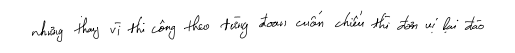

In [ ]:
dataset[0][0]

In [ ]:
dataset[0][0]

0.6730769230769231

In [ ]:
def resize_img(img,desired_height,desired_width):
  height=img.height
  width=img.width
  old_size = img.size
  desired_ratio=desired_width/desired_height
  if width > desired_width:
    suppose_height=height/desired_ratio
    result = Image.new(img.mode, (width, suppose_height), (255, 255, 255))
    result

In [ ]:
from PIL import Image, ImageOps
def padding(img, expected_size):
    desired_size = expected_size
    delta_width = desired_size - img.size[0]
    delta_height = desired_size - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding,0)


def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding,255)

In [ ]:

Imagezs=[]
Labelzs=[]
img_path='/content/gdrive/MyDrive/Img_data'
label_path='/content/gdrive/MyDrive/Label'
from PIL import Image
import numpy as np
import cv2
i=0
for img in os.listdir(img_path):
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
  if len(FileContent)>10 and len(FileContent)<128:
        # 6. Map the characters in label to numbers
    Imagezs.append(os.path.join(img_path,img))
    Labelzs.append(FileContent)
  print(i)
  i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
234

In [ ]:
dataset=[]
Images=[]
Labels=[]
save_path='/content/gdrive/MyDrive/Img_data'
from PIL import Image
import numpy as np
import cv2
i=0
for img in os.listdir(img_path):
  img_array=cv2.imread(os.path.join(img_path,img),cv2.IMREAD_GRAYSCALE)
  new_img = Image.fromarray(img_array)
  new_img=resize_with_padding(new_img,(512,48))
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
  if len(FileContent)>10:
    new_img.save(os.path.join(save_path,img))
    open_cv_image = np.array(new_img)
        # 6. Map the characters in label to numbers
    dataset.append([open_cv_image,FileContent])
    img_path_list.append(os.path.join(img_path,img))
    Images.append(os.path.join(img_path,img))
    Labels.append(str(FileContent))
  print(i)
  i=i+1

In [ ]:

Images=[]
Labels=[]
img_path='/content/gdrive/MyDrive/Img_data'
label_path='/content/gdrive/MyDrive/Label'
from PIL import Image
import numpy as np
import cv2
i=0
for img in os.listdir(img_path):
  img_array=cv2.imread(os.path.join(img_path,img),cv2.IMREAD_GRAYSCALE)
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
  if len(FileContent)>10 and len(FileContent)<128:
        # 6. Map the characters in label to numbers
    Images.append(img_array)
    Labels.append(str(FileContent))
  print(i)
  i=i+1
df = pd.DataFrame(Labels, columns =['Name', 'Age'])

FileNotFoundError: ignored

In [ ]:
from PIL import Image
Images=[]
Labels=[]
Im=[]
Imagezs=[]
img_path='/content/Feature_Img'
label_path='/content/Label'
from PIL import Image
import numpy as np
import cv2
i=0
for img in os.listdir(img_path):
  img_array=cv2.imread(os.path.join(img_path,img),cv2.IMREAD_GRAYSCALE)
  im = Image.fromarray(img_array)
  width, height = im.size
  if height>200:
    top = height / 2
    im = im.crop((0, top, 0, 0))
  if width<512:
    im=resize_with_padding(im,(512,52))
  new = im.resize((256,26),Image.LANCZOS)
  Im.append(new)
  open_cv_image = np.array(new)
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
  if len(FileContent)>10 and len(FileContent)<128:
        # 6. Map the characters in label to numbers
    Images.append(open_cv_image)
    Labels.append(str(FileContent))
    Imagezs.append(os.path.join(img_path,img))
  print(i)
  i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


NameError: ignored

In [ ]:
from PIL import Image
Images=[]
Labels=[]
Im=[]
Imagezs=[]
img_path='/content/Feature_Img'
label_path='/content/Label'
from PIL import Image
import numpy as np
import cv2
i=0
for img in os.listdir(img_path):
  try:
    img_array=cv2.imread(os.path.join(img_path,img),cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(img_array)
    width, height = im.size
    if height>200:
      top = height / 2
      im = im.crop((0, top, 0, 0))
    # if width<512:
    #   im=resize_with_padding(im,(512,52))
    new = im.resize((512,52),Image.LANCZOS)
    Im.append(new)
    open_cv_image = np.array(new)
    my_tring=img[:-4]
    the_string=my_tring+'.txt'
    file1 = open(os.path.join(label_path,the_string), "r")
    FileContent = file1.read()
    file1.close()
    if len(FileContent)>10 and len(FileContent)<128:
        # 6. Map the characters in label to numbers
      Images.append(open_cv_image)
      Labels.append(str(FileContent))
      Imagezs.append(os.path.join(img_path,img))
    print(i)
    i=i+1
  except:
    print('Loi')
    pass

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
248

In [ ]:
Im[34]

In [ ]:
len(Images)

7153

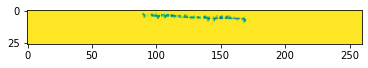

In [ ]:
plt.imshow(Images[32])
plt.show()

In [ ]:
Labels[32]

'ty. Khoảng 11 g 30 đêm 13, lúc anh em đang ngủ thì thảm nạn xảy'

In [ ]:
# Get list of all the captcha images
# Images = sorted( list(map(str, list(data_dir.glob('*.png')))) )
# Labels = [ img.split(os.path.sep)[-1].split(".png")[0] for img in Images ]
from torchvision import transforms
convert_tensor = transforms.ToTensor()
Images=[]
Labels=[]
for feature,label in dataset:
  Images.append(feature)
  Labels.append(label)

NameError: ignored

In [ ]:
img_path='/content/gdrive/MyDrive/Img_data'

In [ ]:
Characters = set( char for label in Labels for char in label )
# Image_Height = set( tf.image.decode_png(tf.io.read_file(os.path.join(img_path,img))).shape[0] for img in Imagezs )
# Image_Width = set( tf.image.decode_png(tf.io.read_file(os.path.join(img_path,img))).shape[1] for img in Imagezs )

# Max_Length = max([ len(label) for label in Labels ])

# print( 'Number of images found: ', len(Images) )
# print( 'Number of labels found: ', len(Labels), '\n' )
# print( 'Width of any captcha image:', next(iter(Image_Width)) )
# print( 'Height of any captcha image:', next(iter(Image_Height)) )
# print( 'Characters present: ', Characters ) 
# print( 'Number of unique characters: ', len(Characters) )
# print( 'Maxium length of any captcha image: ', Max_Length )

In [ ]:
from collections import Counter
width_list=[]
height_list=[]
for img in os.listdir(img_path):
  image=Image.open(os.path.join(img_path,img))
  image_width=image.width
  image_height=image.height
  width_list.append(image_width)
  height_list.append(image_height)
Counter(height).keys() # equals to list(set(words))
Counter(height).values() # counts the elements' frequency

TypeError: ignored

In [ ]:
new_char=sorted(Characters)

In [ ]:
new_char

[' ',
 '!',
 '"',
 '%',
 '&',
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 'y',
 'z',
 'À',
 'Á',
 'Â',
 'Ô',
 'Ú',
 'Ý',
 'à',
 'á',
 'â',
 'ã',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ò',
 'ó',
 'ô',
 'õ',
 'ù',
 'ú',
 'ý',
 'Ă',
 'ă',
 'Đ',
 'đ',
 'ĩ',
 'ũ',
 'Ơ',
 'ơ',
 'Ư',
 'ư',
 'ạ',
 'Ả',
 'ả',
 'Ấ',
 'ấ',
 'Ầ',
 'ầ',
 'ẩ',
 'ẫ',
 'ậ',
 'ắ',
 'ằ',
 'ẳ',
 'ẵ',
 'ặ',
 'ẹ',
 'ẻ',
 'ẽ',
 'ế',
 'Ề',
 'ề',
 'Ể',
 'ể',
 'ễ',
 'Ệ',
 'ệ',
 'ỉ',
 'ị',
 'ọ',
 'ỏ',
 'Ố',
 'ố',
 'Ồ',
 'ồ',
 'ổ',
 'ỗ',
 'ộ',
 'ớ',
 'ờ',
 'Ở',
 'ở',
 'ỡ',
 'ợ',
 'ụ',
 'Ủ',
 'ủ',
 'ứ',
 'ừ',
 'ử',
 'ữ',
 'ự',
 'ỳ',
 'ỷ',
 'ỹ']

# Hyper-parameters  超參數

In [ ]:
# Desired image dimensions where img_width % 4==0 and img_height % 16==0 
img_width = 260
img_height = 26

# Number of passes of the entire training set the algorithm has completed
Epochs = 100

# Number of each batch
Batch_Size = 64

# Early Stopping
'''
min_delta: 容忍模型進步的最小幅度
patience: 容忍訓練無再進步時的 Epoch 次數
'''
Early_Stopping_Patience = 10 
Min_Delta = 0.0001

# Preprocessing  資料預處理

In [ ]:
Characters = set( char for label in Labels for char in label )
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
                  vocabulary=sorted(list(Characters)), num_oov_indices=0, mask_token=None )

# Mapping integers back to original characters
num_to_char = layers.experimental.preprocessing.StringLookup(
                  vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True )

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [ ]:
def encode_single_sample( img_path, label ):
    # 1. Read image
    img_array=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    new_img = Image.fromarray(img_array)
    new_img=resize_with_padding(new_img,(512,48))
    open_cv_image = np.array(new_img)
    open_cv_image =np.array(open_cv_image).reshape(48,512,1)
    tensor = tf.constant(open_cv_image)
    img = tf.image.convert_image_dtype( tensor, tf.float32 )
    img = tf.transpose( img, perm=[1,0,2] )
    # 6. Map the characters in label to numbers
    label = char_to_num( tf.strings.unicode_split(label, input_encoding='UTF-8') )
    # 7. Return a dict as our model is expecting two inputs
    return { "image": img, "label": label }

In [ ]:
open_cv_image.shape

(48, 512, 1)

In [ ]:
img_width = 512
img_height = 48

# Training and Validation Sets  訓練集與驗證集

In [ ]:
def encode_single_sample( img_path, label ):
    # 1. Read image
    img = tf.io.read_file( img_path )
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png( img, channels=1 )
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype( img, tf.float32 )
    # 4. Resize to the desired size
    img = tf.image.resize( img, [img_height,img_width] )
    # 5. Transpose the image because we want the time dimension to correspond to the width of the image, 
    #    i.e., shape = (img_width,img_height,1).
    img = tf.transpose( img, perm=[1,0,2] )
    # 6. Map the characters in label to numbers
    label = char_to_num( tf.strings.unicode_split(label, input_encoding='UTF-8') )
    # 7. Return a dict as our model is expecting two inputs
    return { "image": img, "label": label }

In [ ]:
    img = tf.io.read_file( '/content/gdrive/MyDrive/Img_data/20160722_0202_26749_1_tg_6_7.png' )
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png( img, channels=1 )
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype( img, tf.float32 )
    # 4. Resize to the desired size
    img = tf.image.resize( img, [512,48] )
    # 5. Transpose the image because we want the time dimension to correspond to the width of the image, 
    #    i.e., shape = (img_width,img_height,1).
    img = tf.transpose( img, perm=[1,0,2] )
    # 6. Map the characters in label to numbers

In [ ]:
img.shape

TensorShape([48, 512, 1])

In [ ]:
x_train.shape

(6080, 48, 512, 1)

In [ ]:
cc=np.transpose(x_train[0],(1,0,2))

In [ ]:
cc.shape

(48, 512, 1)

In [ ]:
# Splitting dataset into training and validation sets
def split_data( Images, Labels, train_size=0.9, shuffle=True ):
    # 1. Get the total amount of the dataset
    size = len( Images )
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange( size )
    if shuffle:
        np.random.seed(42) 
        np.random.shuffle( indices )
    # 3. Get the size of training samples
    train_samples = int( size*train_size )
    # 4. Split data into training and validation sets
    x_train, y_train = Images[indices[:train_samples]], Labels[indices[:train_samples]]
    x_valid, y_valid = Images[indices[train_samples:]], Labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid

x_train, x_valid, y_train, y_valid = split_data( np.array(Imagezs), np.array(Labelzs) )

print( 'Number of training set:', len(x_train) )
print( 'Number of validation set:', len(x_valid) )

NameError: ignored

In [ ]:
def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(new_char.index(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=new_char[ch]
    return ret

In [ ]:
ne=label_to_num(Labels[0])

In [ ]:
ne

array([ 59,  56,  81,  51,   0,  51, 151,  49,   0,  62,  55, 105, 144,
        57,   0,  68,  56,  80,  62,  56,   0,  99, 106,  68,   7,   0,
        62,  55,  56, 100,  49,   0,  60,  80,   0,  51,  90,   0,  99,
       105, 148,  51,   0,  61, 142,  68,   0,  51,  69, 142,  51,   0,
        67, 137,  62,  55,   0,  55,  57,  80,  69])

In [ ]:
Images[0].shape

(26, 257, 4)

In [ ]:
from sklearn.model_selection import train_test_split
New_img=np.array(Images).reshape(-1,512,52,1)
New_img=New_img/255
new_img_list=[]
# for img in New_img:
#   new_img_list.append(np.transpose(img,(1,0,2)))
# new_img_list=np.array(new_img_list)
new_labels=[]
for label in Labels:
  new_labels.append(label_to_num(label))
x_train, x_valid, y_train, y_valid = train_test_split(New_img,new_labels, test_size=0.1, random_state=42)
  
print( 'Number of training set:', len(x_train) )
print( 'Number of validation set:', len(x_valid) )

Number of training set: 6437
Number of validation set: 716


In [ ]:
New_img[0].shape

(512, 52, 1)

In [ ]:
x_train.shape

(6437, 512, 52, 1)

In [ ]:
New_img=np.array(Images).reshape(-1,512,48,1)
New_img=New_img/255
New_img[0]

In [ ]:
len(Images)

7154

In [ ]:
import statistics
max_str_len=0
label_len_list=[]
for label in Labels:
  if max_str_len<len(label):
    max_str_len=len(label)
  label_len_list.append(len(label))
print(max_str_len)
statistics.mean(label_len_list)

125


68.68516706277086

In [ ]:
from keras.preprocessing.sequence import pad_sequences
# max_str_len=max([len(label) for label in Labels])
train_size=len(x_train)
num_of_timestamps=128
Characters = set( char for label in Labels for char in label )
train_y = pad_sequences(y_train, maxlen=max_str_len ,padding='post', value = -1)
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(y_train[i])

In [ ]:
max_str_len

125

In [ ]:
print('True label : ',y_train[100] , '\ntrain_y : ',train_y[100],'\ntrain_label_len : ',train_label_len[100], 
      '\ntrain_input_len : ', train_input_len[100])

True label :  [ 97  62   0  61 121   0  68  56  88  51  56   0  62  56  82  62   0  62
  55  80  72   0  19   0   8   0  14   9   0  36  90  62   0  51  49  62
  56   0  51  90   0  68  56 128   0  56 103  57   0  61 120  62   7   0
  61  90  62   0  51  81   0  67 137  68   0  99  81  62  55] 
train_y :  [ 97  62   0  61 121   0  68  56  88  51  56   0  62  56  82  62   0  62
  55  80  72   0  19   0   8   0  14   9   0  36  90  62   0  51  49  62
  56   0  51  90   0  68  56 128   0  56 103  57   0  61 120  62   7   0
  61  90  62   0  51  81   0  67 137  68   0  99  81  62  55  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1] 
train_label_len :  [69.] 
train_input_len :  [126.]


In [ ]:
train_size

6438

In [ ]:
len(train_label_len)

6438

In [ ]:
len(y_train)

5723

In [ ]:
max([len(label) for label in Labels])

158

In [ ]:
from keras.preprocessing.sequence import pad_sequences
# max_str_len=max([len(label) for label in Labels])
valid_size=len(x_valid)
num_of_timestamps=128
valid_y = pad_sequences(y_valid, maxlen=max_str_len ,padding='post', value =-1)
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(y_valid[i])

In [ ]:

# Create training and valodation dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices( (x_train,y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(87)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices( (x_valid,y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(87)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [ ]:
data=tf.data.Dataset.from_tensor_slices( (x_valid,y_valid))
len(data)

1431

In [ ]:
len(train_dataset)

90

In [ ]:
train_dataset

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 512, 48, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=2500,reshuffle_each_iteration=True)

In [ ]:
for i in range(len(Images)):
  encode_single_sample(Images[i],Labels[i])

In [ ]:
# Visualize the Training Dataset
_, ax = plt.subplots( 4, 4, figsize=(10,5) )
for batch in train_dataset.take(5):
    images = batch['image']
    labels = batch['label']
    for i in range(16):
        img = ( images[i]*255 ).numpy().astype('uint8')
        label = tf.strings.reduce_join( num_to_char(labels[i]) ).numpy().decode('utf-8')
        ax[i // 4, i % 4].imshow( img[:, :, 0].T, cmap='gray' )
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis('off')
plt.show()

In [ ]:
for batch in train_dataset.take():
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")

InvalidArgumentError: ignored

In [ ]:
for batch in train_dataset.take(1):
  print('fun')

InvalidArgumentError: ignored

In [ ]:
x_train.shape

(5723,)

In [ ]:
y_train.shape

(5723,)

In [ ]:
train_dataset.take(1)

<TakeDataset element_spec={'image': TensorSpec(shape=(None, 512, 48, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

# Convolutional Recurrent Neural Network(CRNN)  卷積循環神經網絡  

# Model

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
input_data = Input(shape=(512, 52, 1), name='input')
# input_data = Input(shape=(None, None, 1), name='input')
inner = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
# inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((128, 768)), name='reshape')(inner)
inner = Dense(256, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(len(Characters)+1, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 512, 52, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 512, 52, 32)       320       
                                                                 
 batch_normalization_42 (Bat  (None, 512, 52, 32)      128       
 chNormalization)                                                
                                                                 
 activation_42 (Activation)  (None, 512, 52, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 256, 26, 32)       0         
                                                                 
 conv2 (Conv2D)              (None, 256, 26, 64)       18496     
                                                           

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
input_data = Input(shape=(512, 52, 1), name='input')
# input_data = Input(shape=(None, None, 1), name='input')
inner = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1',strides=2)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max2',strides=2)(inner)
# inner = Dropout(0.3)(inner)

inner = Conv2D(256, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3',strides=1)(inner)
inner = Conv2D(512, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Conv2D(512, (3, 3), padding='same', name='conv6', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max4')(inner)
inner = Conv2D(512, (3, 3), padding='same', name='conv7', kernel_initializer='he_normal')(inner)
# CNN to RNN
inner = Reshape(target_shape=((768, 512)), name='reshape')(inner)
inner = Dense(256, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(len(Characters)+1, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 512, 52, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 512, 52, 64)       640       
                                                                 
 activation_4 (Activation)   (None, 512, 52, 64)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 256, 26, 64)       0         
                                                                 
 conv2 (Conv2D)              (None, 256, 26, 128)      73856     
                                                                 
 activation_5 (Activation)   (None, 256, 26, 128)      0         
                                                                 
 max2 (MaxPooling2D)         (None, 128, 13, 128)      0     

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
input_data = Input(shape=(512, 52, 1), name='input')
# input_data = Input(shape=(None, None, 1), name='input')
inner = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1',strides=1)(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(input_data)  
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2',strides=2)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3',strides=2)(inner)
# inner = Dropout(0.3)(inner)

inner = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(inner)
inner = Conv2D(256, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max4',strides=1)(inner)
inner = Conv2D(512, (3, 3), padding='same', name='conv6', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Conv2D(512, (3, 3), padding='same', name='conv7', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max5')(inner)
inner = Conv2D(512, (3, 3), padding='same', name='conv8', kernel_initializer='he_normal')(inner)
# CNN to RNN
inner = Reshape(target_shape=((128, 3072)), name='reshape')(inner)
inner = Dense(256, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(len(Characters)+1, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 512, 52, 1)]      0         
                                                                 
 conv2 (Conv2D)              (None, 512, 52, 64)       640       
                                                                 
 activation_19 (Activation)  (None, 512, 52, 64)       0         
                                                                 
 max2 (MaxPooling2D)         (None, 256, 26, 64)       0         
                                                                 
 conv3 (Conv2D)              (None, 256, 26, 128)      73856     
                                                                 
 activation_20 (Activation)  (None, 256, 26, 128)      0         
                                                                 
 max3 (MaxPooling2D)         (None, 128, 13, 128)      0   

In [ ]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0005))

model_final.fit(x=[x_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([x_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=60, batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
190/190 [==============================] - 40s 119ms/step - loss: inf - val_loss: 248.5569
Epoch 2/60
190/190 [==============================] - 20s 105ms/step - loss: inf - val_loss: 247.5423
Epoch 3/60
190/190 [==============================] - 20s 103ms/step - loss: inf - val_loss: 246.5453
Epoch 4/60
190/190 [==============================] - 20s 103ms/step - loss: inf - val_loss: 220.2753
Epoch 5/60
190/190 [==============================] - 20s 103ms/step - loss: inf - val_loss: 218.4068
Epoch 6/60
190/190 [==============================] - 19s 103ms/step - loss: inf - val_loss: 215.6685
Epoch 7/60
190/190 [==============================] - 20s 103ms/step - loss: inf - val_loss: 217.2247
Epoch 8/60
190/190 [==============================] - 19s 103ms/step - loss: inf - val_loss: 212.6834
Epoch 9/60
190/190 [==============================] - 20s 103ms/step - loss: inf - val_loss: 218.5213
Epoch 10/60
190/190 [==============================] - 19s 102ms/step - loss: inf 

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0001))

model_final.fit(x=[x_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([x_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=100, batch_size=16)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
403/403 [==============================] - 95s 177ms/step - loss: 254.1100 - val_loss: inf
Epoch 2/100
403/403 [==============================] - 67s 166ms/step - loss: 245.5541 - val_loss: inf
Epoch 3/100
403/403 [==============================] - 67s 166ms/step - loss: 244.6973 - val_loss: inf
Epoch 4/100
403/403 [==============================] - 67s 167ms/step - loss: 243.8623 - val_loss: inf
Epoch 5/100
403/403 [==============================] - 67s 166ms/step - loss: 243.1908 - val_loss: inf
Epoch 6/100
403/403 [==============================] - 67s 166ms/step - loss: 242.7442 - val_loss: inf
Epoch 7/100
403/403 [==============================] - 67s 166ms/step - loss: 242.2388 - val_loss: inf
Epoch 8/100
403/403 [==============================] - 67s 165ms/step - loss: 241.7656 - val_loss: inf
Epoch 9/100
403/403 [==============================] - 67s 167ms/step - loss: 239.9395 - val_loss: inf
Epoch 10/100
403/403 [==============================] - 67s 166ms/step - 

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0005))

model_final.fit(x=[x_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([x_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=50, batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
202/202 [==============================] - 122s 485ms/step - loss: inf - val_loss: 221.2229
Epoch 2/50
202/202 [==============================] - 97s 481ms/step - loss: inf - val_loss: 222.3206
Epoch 3/50
202/202 [==============================] - 98s 487ms/step - loss: inf - val_loss: 230.4703
Epoch 4/50
202/202 [==============================] - 98s 485ms/step - loss: inf - val_loss: 211.9079
Epoch 5/50
202/202 [==============================] - 98s 486ms/step - loss: inf - val_loss: 211.6009
Epoch 6/50
202/202 [==============================] - 98s 486ms/step - loss: inf - val_loss: 220.7955
Epoch 7/50
202/202 [==============================] - 98s 487ms/step - loss: inf - val_loss: 211.4001
Epoch 8/50
202/202 [==============================] - 98s 486ms/step - loss: inf - val_loss: 222.0810
Epoch 9/50
202/202 [==============================] - 98s 485ms/step - loss: inf - val_loss: 237.6422
Epoch 10/50
202/202 [==============================] - 98s 485ms/step - loss: inf

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.001))

model_final.fit(x=[x_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([x_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=60, batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
202/202 [==============================] - 33s 113ms/step - loss: inf - val_loss: 290.3789
Epoch 2/60
202/202 [==============================] - 21s 102ms/step - loss: inf - val_loss: 222.9673
Epoch 3/60
202/202 [==============================] - 20s 101ms/step - loss: inf - val_loss: 221.6576
Epoch 4/60
202/202 [==============================] - 21s 102ms/step - loss: inf - val_loss: 216.8195
Epoch 5/60
202/202 [==============================] - 20s 101ms/step - loss: inf - val_loss: 209.3746
Epoch 6/60
202/202 [==============================] - 20s 101ms/step - loss: inf - val_loss: 207.0521
Epoch 7/60
202/202 [==============================] - 21s 102ms/step - loss: inf - val_loss: 208.1294
Epoch 8/60
202/202 [==============================] - 20s 102ms/step - loss: inf - val_loss: 207.7956
Epoch 9/60
202/202 [==============================] - 20s 101ms/step - loss: inf - val_loss: 207.6598
Epoch 10/60
202/202 [==============================] - 20s 101ms/step - loss: inf 

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0005))

model_final.fit(x=[x_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([x_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=60, batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
202/202 [==============================] - 44s 112ms/step - loss: inf - val_loss: 278.3688
Epoch 2/60
202/202 [==============================] - 20s 98ms/step - loss: inf - val_loss: 225.4085
Epoch 3/60
202/202 [==============================] - 20s 98ms/step - loss: inf - val_loss: 222.8598
Epoch 4/60
202/202 [==============================] - 20s 98ms/step - loss: inf - val_loss: 212.4412
Epoch 5/60
202/202 [==============================] - 20s 97ms/step - loss: inf - val_loss: 212.8260
Epoch 6/60
202/202 [==============================] - 20s 98ms/step - loss: inf - val_loss: 210.7387
Epoch 7/60
202/202 [==============================] - 20s 100ms/step - loss: inf - val_loss: 215.9608
Epoch 8/60
202/202 [==============================] - 20s 97ms/step - loss: inf - val_loss: 207.4827
Epoch 9/60
202/202 [==============================] - 20s 98ms/step - loss: inf - val_loss: 208.6822
Epoch 10/60
202/202 [==============================] - 20s 101ms/step - loss: inf - val_l

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0005))

model_final.fit(x=[x_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([x_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=50, batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
202/202 [==============================] - 34s 144ms/step - loss: inf - val_loss: 244.7380
Epoch 2/50
202/202 [==============================] - 27s 136ms/step - loss: inf - val_loss: 231.1142
Epoch 3/50
202/202 [==============================] - 27s 133ms/step - loss: inf - val_loss: 209.2262
Epoch 4/50
202/202 [==============================] - 27s 133ms/step - loss: inf - val_loss: 212.9499
Epoch 5/50
202/202 [==============================] - 27s 134ms/step - loss: inf - val_loss: 213.8698
Epoch 6/50
202/202 [==============================] - 27s 134ms/step - loss: inf - val_loss: 227.3352
Epoch 7/50
202/202 [==============================] - 29s 144ms/step - loss: inf - val_loss: 232.6354
Epoch 8/50
202/202 [==============================] - 27s 134ms/step - loss: inf - val_loss: 230.0397
Epoch 9/50
202/202 [==============================] - 27s 134ms/step - loss: inf - val_loss: 221.2984
Epoch 10/50
202/202 [==============================] - 27s 134ms/step - loss: inf 

In [ ]:
x_train.shape

(6437, 260, 26, 1)

In [ ]:
preds = model.predict(x_valid)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
preds = model.predict(x_valid)
decoded = K.get_value(K.ctc_beam_search_decoder (preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   beam_width=100, top_paths=1)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
valid_true=[]
i=0
for valid in y_valid:
  valid_true.append(num_to_label(valid))
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = valid_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 1.15%
Correct words predicted      : 0.00%


In [ ]:
prediction[50]

'     '

In [ ]:
valid_true=[]
i=0
for valid in y_valid:
  valid_true.append(num_to_label(valid))
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = valid_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 0.03%
Correct words predicted      : 0.00%


In [ ]:
prediction[30]

'ỉHỉHá'

In [ ]:
valid_true=[]
i=0
for valid in y_valid:
  valid_true.append(num_to_label(valid))
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = valid_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 6.89%
Correct words predicted      : 0.00%


In [ ]:
prediction[309]

't  àn tàn tàn tàn.'

In [ ]:
preds = model.predict(x_train)
prediction[1]

In [ ]:
preds = model.predict(x_valid)

In [ ]:
preds

array([[[1.8388784e-02, 1.0250999e-03, 9.5173530e-03, ...,
         7.3478156e-04, 8.6335151e-04, 1.6370766e-01],
        [1.7745340e-02, 5.7859218e-04, 6.5620230e-03, ...,
         3.7435364e-04, 5.3738506e-04, 2.6737103e-01],
        [1.7654575e-02, 3.0640830e-04, 4.1055214e-03, ...,
         1.8517852e-04, 2.8388231e-04, 4.3347964e-01],
        ...,
        [2.8311135e-02, 1.4618978e-04, 1.7196707e-03, ...,
         8.7196058e-05, 5.9324564e-05, 5.8731920e-01],
        [2.2355255e-02, 2.9541395e-04, 2.2428185e-03, ...,
         1.7248474e-04, 1.2205819e-04, 4.3752366e-01],
        [1.9643784e-02, 6.3794199e-04, 2.7896641e-03, ...,
         3.9214111e-04, 2.7430293e-04, 2.3761244e-01]],

       [[2.0371817e-02, 1.0354914e-03, 1.0158964e-02, ...,
         6.7849149e-04, 9.2585286e-04, 1.2765595e-01],
        [2.0549506e-02, 6.0545030e-04, 7.2318520e-03, ...,
         3.5192817e-04, 5.9658516e-04, 2.1062075e-01],
        [2.1927113e-02, 3.4023315e-04, 4.8067840e-03, ...,
         1.819

In [ ]:
decoded

array([[ 0, -1, -1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1, -1, -1],
       ...,
       [ 0, -1, -1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1, -1, -1]])

In [ ]:
valid_true=[]
i=0
for valid in y_valid:
  print(i)
  valid_true.append(num_to_label(valid))
  i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
y_valid[0]

array([ 55,  57, 105, 144,  62,  55,   7,   0,  51,  81,  57,   0,  50,
        80,  62,   7,   0,  51,  81,  57,   0,  55,  56, 124,   9,   0,
        37,  55, 105, 144,  57,   0,  62,  55,  56,  84,  63,   0,  59,
        56,  57,   0,  62,  56, 115,  62,   0,  62,  56,  80,   0,  99,
       126,  69,   0,  51, 108,  61,   0, 103,  62,   7])

# Callbacks  回調函數

In [ ]:
# Model Check Point
Check_Point = ModelCheckpoint( 'CRNN.h5',   # Filepath
                               monitor='val_loss',
                               save_best_only=True,
                               verbose=1,
                               mode='auto',
                               save_weights_only=False,
                               save_freq='epoch' )

In [ ]:
# Add early stopping
Early_Stopping = EarlyStopping( monitor='val_loss',
                                min_delta=Min_Delta,
                                patience=Early_Stopping_Patience,
                                verbose=1,
                                mode='auto',
                                baseline=None,
                                restore_best_weights=True )

# Training Model  訓練模型

In [ ]:
History = CRNN.fit((x_train,y_train), batch_size=64,
                               validation_data = (x_valid,y_valid),
                              verbose = 2, epochs=Epochs, callbacks=[ Check_Point, Early_Stopping ])

In [ ]:
History = CRNN.fit( train_dataset, validation_data=validation_dataset, epochs=Epochs, 
                    callbacks=[ Check_Point, Early_Stopping ])  

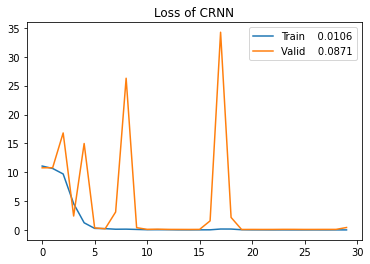

In [ ]:
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.subplot( )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train'+"{:10.4f}".format( min(History.history['loss']) ) )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Valid'+"{:10.4f}".format( min(History.history['val_loss']) ) )
plt.legend( loc='upper right' )
plt.title( 'Loss of CRNN')
plt.show()

# Inference  預測

In [ ]:
# Get the prediction model by extracting layers till the output layer
prediction_model = Model( CRNN.get_layer( name='Input' ).input, CRNN.get_layer( name='Softmax' ).output, name='Prediction' )
prediction_model.summary()

Model: "Prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 104, 32, 1)]      0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 104, 32, 64)       640       
_________________________________________________________________
MaxPooling_1 (MaxPooling2D)  (None, 52, 16, 64)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 52, 16, 128)       73856     
_________________________________________________________________
MaxPooling_2 (MaxPooling2D)  (None, 26, 8, 128)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 26, 8, 256)        295168    
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 26, 8, 256)        1

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


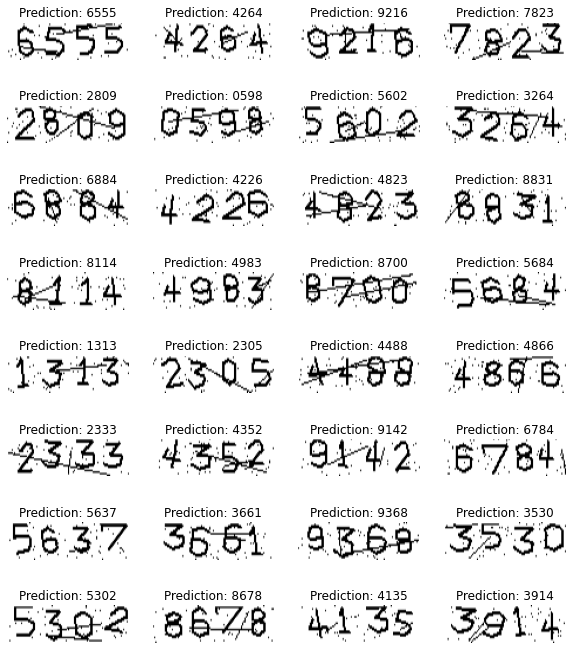

In [ ]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = K.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:,:Max_Length]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')
        output_text.append(res)
    return output_text

#  Check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch['image']
    batch_labels = batch['label']

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode('utf-8')
        orig_texts.append(label)

    _, ax = plt.subplots( 8, 4, figsize=(10,12) )
    for i in range(len(pred_texts)):
        img = ( batch_images[i, :, :, 0]*255).numpy().astype(np.uint8)
        img = img.T
        title = f'Prediction: {pred_texts[i]}'
        ax[i // 4, i % 4].imshow( img, cmap='gray' )
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

# Programming Guides  程式語法指南     

> ## (1) Image Preprocessing  圖片預處理  

- ### [Module: tf.image](https://www.tensorflow.org/api_docs/python/tf/image)、[tf.image.convert_image_dtype](https://www.tensorflow.org/api_docs/python/tf/image/convert_image_dtype)、[tf.image.resize](https://www.tensorflow.org/api_docs/python/tf/image/resize)  
- ### [tf.io.read_file](https://www.tensorflow.org/api_docs/python/tf/io/read_file)、[tf.io.decode_png](https://www.tensorflow.org/api_docs/python/tf/io/decode_png)

> ## (2) Modeling  建模  
  
- ### [Making new layers and models via subclassing](https://keras.io/guides/making_new_layers_and_models_via_subclassing/)
- ### [tf.keras.layers.experimental.preprocessing.StringLookup](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/StringLookup)
- ### [tf.Tensor](https://www.tensorflow.org/api_docs/python/tf/Tensor)、[tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape)、[tf.cast](https://www.tensorflow.org/api_docs/python/tf/cast)、[tf.nn.ctc_loss](https://www.tensorflow.org/api_docs/python/tf/nn/ctc_loss)、[tf.keras.backend.ctc_batch_cost](https://www.tensorflow.org/api_docs/python/tf/keras/backend/ctc_batch_cost)    

- ### [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)、[tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)、[tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)、<br>[tf.keras.layers.Bidirectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)、[tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

- ### [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)  
- ### [tf.keras.callbacks.ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)、[tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

# New One

In [ ]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Mounted at /content/gdrive


In [ ]:
!gdown 1cOOJGVmxVo1evTU9xQdSbztFmeFXTwif

Downloading...
From: https://drive.google.com/uc?id=1cOOJGVmxVo1evTU9xQdSbztFmeFXTwif
To: /content/Feature_Img.rar
100% 59.6M/59.6M [00:00<00:00, 172MB/s]


In [ ]:
!gdown 1NSzSUdXXhK8exFlrSUcLwjBicLLCjt6q

Downloading...
From: https://drive.google.com/uc?id=1NSzSUdXXhK8exFlrSUcLwjBicLLCjt6q
To: /content/Label.rar
100% 1.16M/1.16M [00:00<00:00, 106MB/s]


In [ ]:
!unrar x '/content/Feature_Img.rar' '/content/Feature_img'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Feature_Img.rar

No files to extract


In [ ]:
!unrar x '/content/Label.rar' '/content/Labels'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Label.rar

No files to extract


In [ ]:
Images=[]
Labels=[]
name_list=[]
image_path='/content/Feature_Img'
label_path='/content/Label'
from PIL import Image
import numpy as np
import cv2
i=0
for img in os.listdir(image_path):
  img_array=cv2.imread(os.path.join(image_path,img),cv2.IMREAD_GRAYSCALE)
  new_img = Image.fromarray(img_array)
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
        # 6. Map the characters in label to numbers
  Images.append(new_img)
  Labels.append(str(FileContent))
  name_list.append(os.path.join(image_path,img))
  print(i)
  i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
247

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


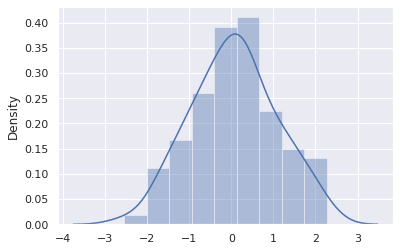

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [ ]:
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [ ]:
height_list

[65,
 69,
 52,
 40,
 58,
 51,
 61,
 64,
 118,
 51,
 50,
 55,
 47,
 52,
 47,
 52,
 59,
 51,
 44,
 61,
 40,
 46,
 49,
 47,
 162,
 44,
 52,
 54,
 59,
 47,
 95,
 49,
 57,
 54,
 50,
 44,
 43,
 54,
 46,
 52,
 48,
 43,
 52,
 46,
 48,
 50,
 46,
 41,
 107,
 55,
 43,
 48,
 73,
 83,
 44,
 228,
 56,
 43,
 52,
 48,
 61,
 48,
 42,
 51,
 46,
 56,
 50,
 54,
 48,
 67,
 41,
 56,
 185,
 54,
 49,
 42,
 46,
 45,
 45,
 52,
 51,
 71,
 42,
 63,
 279,
 44,
 41,
 48,
 61,
 44,
 43,
 63,
 56,
 50,
 58,
 58,
 61,
 64,
 52,
 50,
 43,
 49,
 54,
 47,
 67,
 55,
 44,
 40,
 58,
 49,
 55,
 44,
 49,
 58,
 59,
 53,
 52,
 48,
 50,
 44,
 56,
 337,
 48,
 54,
 45,
 64,
 53,
 50,
 43,
 43,
 40,
 45,
 47,
 41,
 55,
 49,
 53,
 56,
 38,
 59,
 55,
 52,
 43,
 46,
 49,
 49,
 53,
 44,
 44,
 46,
 69,
 42,
 51,
 47,
 62,
 43,
 54,
 46,
 50,
 51,
 49,
 48,
 95,
 62,
 53,
 53,
 56,
 44,
 49,
 50,
 48,
 53,
 44,
 38,
 43,
 47,
 45,
 54,
 54,
 51,
 52,
 126,
 47,
 51,
 52,
 64,
 53,
 43,
 81,
 45,
 55,
 55,
 51,
 57,
 48,
 76,
 132,
 96,
 

In [ ]:
height_list_2=[]

In [ ]:
height_list_2[:] = (value for value in height_list if value < 200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


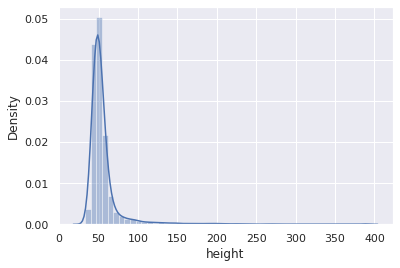

In [ ]:
import pandas as pd
x = pd.Series(height_list, name="height")
ax = sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


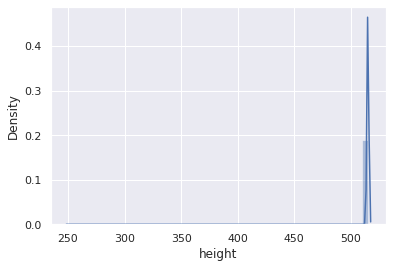

In [ ]:
import pandas as pd
x = pd.Series(width_list, name="height")
ax = sns.distplot(x)

In [ ]:
ax.figure.savefig("output.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


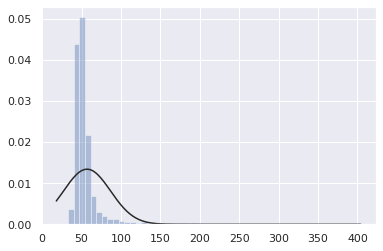

In [ ]:
from scipy.stats import norm
ax = sns.distplot(height_list, fit=norm, kde=False)

In [ ]:
[i for i, e in enumerate(width_list) if e == 251]

[4988]

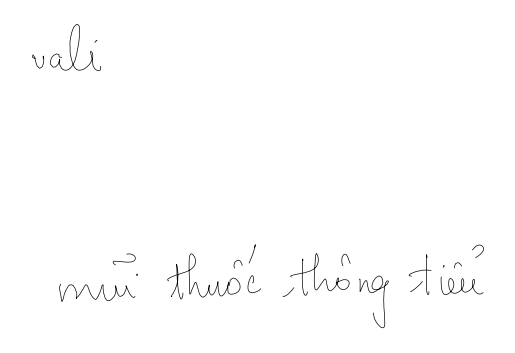

In [ ]:
from PIL import Image
img=Image.open('/content/Feature_Img/20160530_0177_9244_2_tg_1_5.png')
img

In [ ]:
plt.imshow(Images[4566])
plt.show()

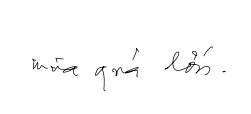

In [ ]:
Images[4988]

In [ ]:
Images[4988]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
Images[0].shape

(47, 515)

In [ ]:
from collections import Counter
from PIL import Image
width_list=[]
height_list=[]
Imagez=[]
Labelz=[]
image_path='/content/Feature_Img'
for img in os.listdir(image_path):
  image=Image.open(os.path.join(image_path,img))
  image_width=image.width
  image_height=image.height
  Imagez.append(image)
  my_tring=img[:-4]
  the_string=my_tring+'.txt'
  file1 = open(os.path.join(label_path,the_string), "r")
  FileContent = file1.read()
  file1.close()
  Labelz.append(FileContent)
  width_list.append(image_width)
  height_list.append(image_height)

In [ ]:
values, counts = np.unique(height_list, return_counts=True)

In [ ]:
values, counts = np.unique(width_list, return_counts=True)

In [ ]:
values

array([251, 314, 334, 396, 410, 446, 491, 499, 512, 515])

In [ ]:
counts

array([   1,    1,    1,    1,    1,    1,    1,    1,    1, 7273])

In [ ]:
[i for i, e in enumerate(width_list) if e == 512]

[3218]

4988 6464 4796 266 5417 6985 7241 508 3218

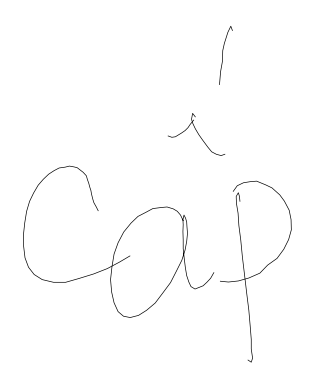

In [ ]:
Images[6464]

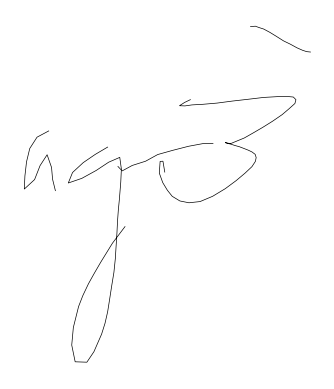

In [ ]:
Images[4796]

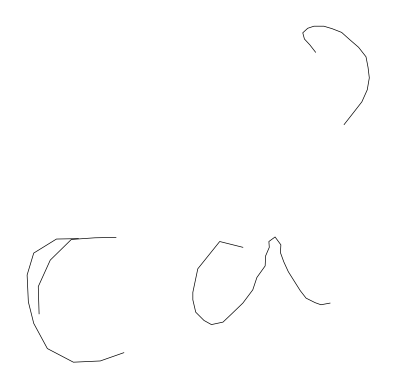

In [ ]:
Images[266]

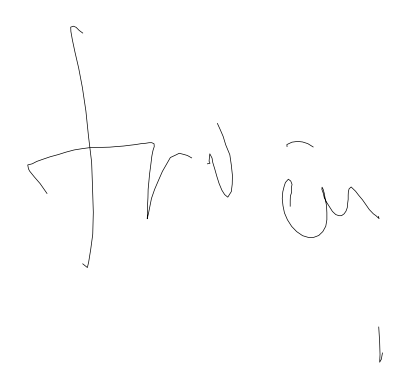

In [ ]:
Images[5417]

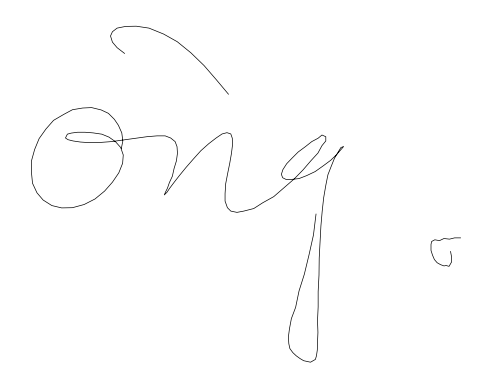

In [ ]:
Images[7241]

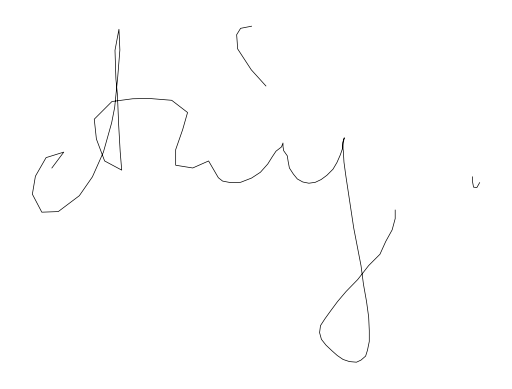

In [ ]:
Images[3218]

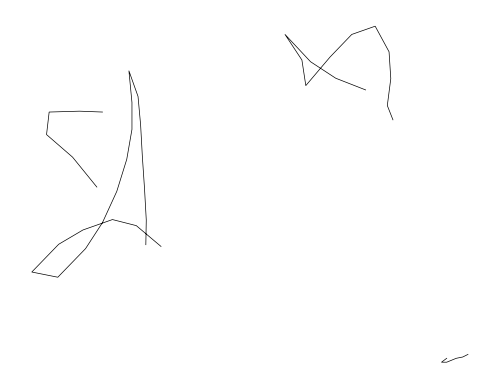

In [ ]:
Images[508]

In [ ]:
values

array([ 33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 157, 159, 161, 162, 164, 165, 166, 167, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 185, 187, 188,
       190, 192, 193, 194, 195, 196, 198, 200, 201, 202, 203, 204, 207,
       209, 210, 212, 213, 215, 217, 218, 220, 221, 222, 223, 224, 226,
       227, 228, 229, 232, 234, 237, 244, 246, 248, 249, 254, 26

In [ ]:
counts

array([  2,   3,   6,  10,  23,  54,  96, 167, 180, 282, 330, 423, 426,
       473, 441, 430, 414, 401, 341, 316, 270, 247, 201, 185, 169, 121,
       116,  82,  77,  68,  56,  51,  31,  43,  29,  37,  32,  25,  21,
        19,  12,  13,  16,  14,  12,  16,  16,  12,  13,  16,   8,  11,
         8,   5,  12,   6,   9,  10,   9,  14,   7,   7,   9,   8,   6,
         8,   6,   9,   1,   6,   4,   4,   4,   5,   6,   3,   3,   3,
         4,   5,   3,   5,   2,   3,   5,   1,   5,   3,   4,   3,   1,
         4,   5,   3,   1,   1,   8,   3,   2,   4,   3,   3,   2,   1,
         2,   3,   2,   1,   3,   3,   3,   1,   1,   6,   2,   1,   1,
         1,   1,   2,   2,   3,   1,   2,   3,   1,   4,   2,   2,   3,
         1,   1,   1,   1,   3,   2,   1,   1,   2,   3,   1,   4,   1,
         1,   4,   1,   2,   2,   1,   2,   3,   2,   1,   2,   1,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   1,
         1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   

In [ ]:
height_list.index(389)

888

In [ ]:
[i for i, e in enumerate(height_list) if e == 106]

[775, 1597, 3244, 6970]

192 176 152 147 137 126 116 106roi

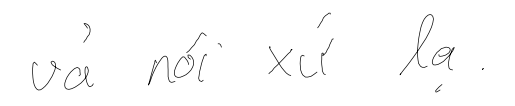

In [ ]:
Imagez[6970]

In [ ]:
Labelz[4342]

'cho tổng công ty để đẩy nhanh hơn tốc độ cổ phần hóa.'

In [ ]:
height_list[888]

389

In [ ]:
Images[888].shape

(79, 515)

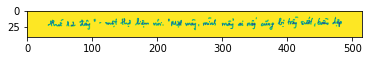

In [ ]:
plt.imshow(Images[1239])
plt.show()

In [ ]:
values, counts = np.unique(width_list, return_counts=True)

In [ ]:
values

array([251, 314, 334, 396, 410, 446, 491, 499, 512, 515])

In [ ]:
counts

array([   1,    1,    1,    1,    1,    1,    1,    1,    1, 7273])

In [ ]:
import statistics
statistics.mean(height_list)

56.948503158472946